In [30]:
from pandas import  *
from seaborn import *
from matplotlib.pyplot import *
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import LabelEncoder

In [31]:
df=read_csv('Advertising.csv')
df

Unnamed: 0     TV  radio  newspaper  sales
0             1  230.1   37.8       69.2   22.1
1             2   44.5   39.3       45.1   10.4
2             3   17.2   45.9       69.3    9.3
3             4  151.5   41.3       58.5   18.5
4             5  180.8   10.8       58.4   12.9
..          ...    ...    ...        ...    ...
195         196   38.2    3.7       13.8    7.6
196         197   94.2    4.9        8.1    9.7
197         198  177.0    9.3        6.4   12.8
198         199  283.6   42.0       66.2   25.5
199         200  232.1    8.6        8.7   13.4

[200 rows x 5 columns]

In [32]:
x=df.iloc[: , 1:4]
x

TV  radio  newspaper
0    230.1   37.8       69.2
1     44.5   39.3       45.1
2     17.2   45.9       69.3
3    151.5   41.3       58.5
4    180.8   10.8       58.4
..     ...    ...        ...
195   38.2    3.7       13.8
196   94.2    4.9        8.1
197  177.0    9.3        6.4
198  283.6   42.0       66.2
199  232.1    8.6        8.7

[200 rows x 3 columns]

In [33]:
y=(df['sales'])

In [34]:
r=LinearRegression()
r.fit(x,y)
r.score(x,y)

0.8972106381789522

In [35]:
r.predict([[44,39,45]])

c:\Users\debna\Downloads\Anaconda33\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([12.25851724])

In [36]:
r2=PolynomialFeatures(degree=2)# degree=9(not for low inputs) is best for this case
x2=r2.fit_transform(x)          # 2,3 is universal degree

In [37]:
l=LinearRegression()
l.fit(x2,y)
l.score(x2,y)

0.9865057435307856

In [38]:
l.predict(r2.fit_transform([[44,39,45]]))

array([10.42281939])

In [39]:
l.predict(r2.fit_transform([[214.7,24.5,4.5]]))

array([17.51145378])

In [40]:
l.predict(r2.fit_transform([[204,32.5,45.5]]))

array([19.22522858])

In [41]:
l.predict(r2.fit_transform([[9,50,76]]))  

array([8.24679132])

In [42]:
l.predict(r2.fit_transform([[200,2.9,22]])) 

array([11.69250597])

In [43]:
l.predict(r2.fit_transform([[150,41,60]])) 

array([18.46362765])

LASSO REG.

In [44]:
from sklearn.linear_model import Lasso
ls=Lasso(alpha=0.1)
ls.fit(x,y)

Lasso(alpha=0.1)

In [45]:
ls.coef_

array([ 0.04575172,  0.18788735, -0.00066758])

In [46]:
names=x.columns
names

Index(['TV', 'radio', 'newspaper'], dtype='object')

In [47]:
rng=range(len(names))

Text(0, 0.5, 'LASSO coeff.')

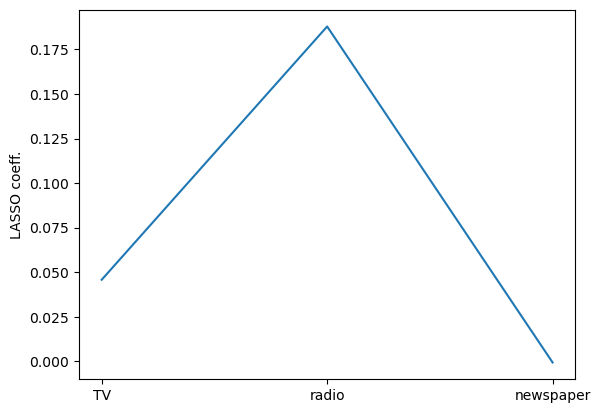

In [48]:
plot(rng,ls.coef_)
xticks(rng,names)
ylabel('LASSO coeff.')

HIGHEST INFLUENCE IS BY RADIO , then TV..

In [49]:
ls.score(x,y)

0.8972068586756202

In [50]:
ls.predict([[44,39,45]])  # wrong pred by Lasso

c:\Users\debna\Downloads\Anaconda33\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(


array([12.25508005])

In [51]:
ls.predict([[214.7,24.5,4.5]])

c:\Users\debna\Downloads\Anaconda33\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(


array([17.36756869])

In [52]:
ls.predict([[204,32.5,45.5]])

c:\Users\debna\Downloads\Anaconda33\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(


array([18.35375351])

In [53]:
ls.predict([[9,50,76]])

c:\Users\debna\Downloads\Anaconda33\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(


array([12.69983591])

In [54]:
ls.predict([[150,41,60]])

c:\Users\debna\Downloads\Anaconda33\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(


array([17.47052333])

ELASTICNET REG.         (accu. is almost as same as Lasso)

In [55]:
from sklearn.linear_model import ElasticNet
e=ElasticNet(l1_ratio=0.5)

In [56]:
e.fit(x,y)
e.score(x,y)

0.8971345697478473

In [57]:
e.predict([[44,39,45]])

c:\Users\debna\Downloads\Anaconda33\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but ElasticNet was fitted with feature names
  warnings.warn(


array([12.22851332])

Text(0, 0.5, 'Elasticnet coeff.')

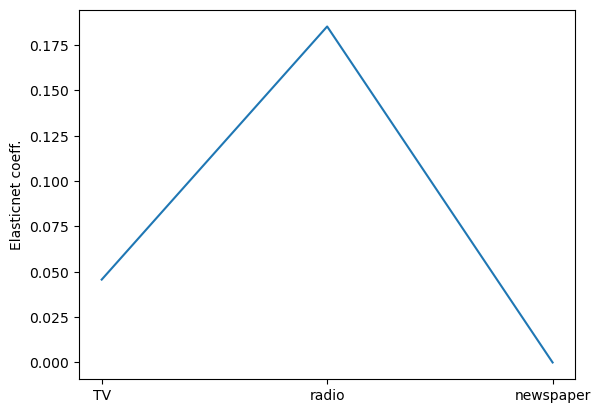

In [58]:
plot(rng,e.coef_)
xticks(rng,names)
ylabel('Elasticnet coeff.')